# Rectangular waveguide disp. in Damon-Eshbach geometry

This notebook will calculate the dispersion relation of the first 20 modes of a rectangular waveguide with 500 nm x 20 nm cross section, permalloy material parameters. To do so, first we create a sample with mesh of a rectangular cross section. A homogeneous initial magnetization state will be set and equilibrated using a 600 mT static external field. Then we calculate the dispersion for the first 20 modes between [kmin,kmax]. Using the ```matplotlib``` library the dispersion will be plotted for the first 5 modes.

In [1]:
import numpy as np
import meshio
import pygmsh

import tetrax as tx

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
sample = tx.create_sample(name="Rectangular_waveguide_500nmx40nm")
sample.Msat = 800e3
sample.Aex = 13e-12
# Geometry of the rectanguar element, width x thickness
width = 500 # in units defined by the sample.scale
thickness = 20 # in units defined by the sample.scale
lca = 2 # tetrahedron edge length along width
lcb = 2 # tetrahedron edge length along thickness
mesh = tx.geometries.rectangle_cross_section(width,thickness,lca,lcb)
sample.set_geom(mesh)

This sample does not have a mesh yet. You cannot set spatially dependent saturation for it.
This sample does not have a mesh yet. You cannot set spatially dependent exchange stiffness for it.
Setting geometry and calculating discretized differential operators on mesh.
Done.


The initial state is homogeneous, oriented along (theta=60.0,phi=0.0) in spherical coordinates. Angles are given in degrees.

In [3]:
sample.mag = tx.vectorfields.homogeneous(sample.xyz, 60.0, 0.0) # arguments (coordinate, theta, phi)
sample.show()

/Users/attilak/anaconda3/lib/python3.10/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

![Rectangular waveguide magnetization equilibrium](rect_waveguide_DE.png)

In [4]:
exp = tx.create_experimental_setup(sample)
bstatic = tx.vectorfields.homogeneous(sample.xyz, 90, 0)
exp.Bext =  600e-3 * bstatic
exp.relax(tol=1e-13)

Minimizing in using 'L-BFGS-B' (tolerance 1e-13) ...
Current energy length density: -7.126786693516217e-21 J/m  mx = 1.00  my = -0.00  mz = -0.00
Success!



True

In [5]:
dispersion = exp.eigenmodes(num_cpus=-1,num_modes=20,kmin=0,kmax=40e6,Nk=41)

100%|█████████████████████████████| 41/41 [03:21<00:00,  4.91s/it]


Plotting the dispersion of the first 6 modes.

<IPython.core.display.Javascript object>


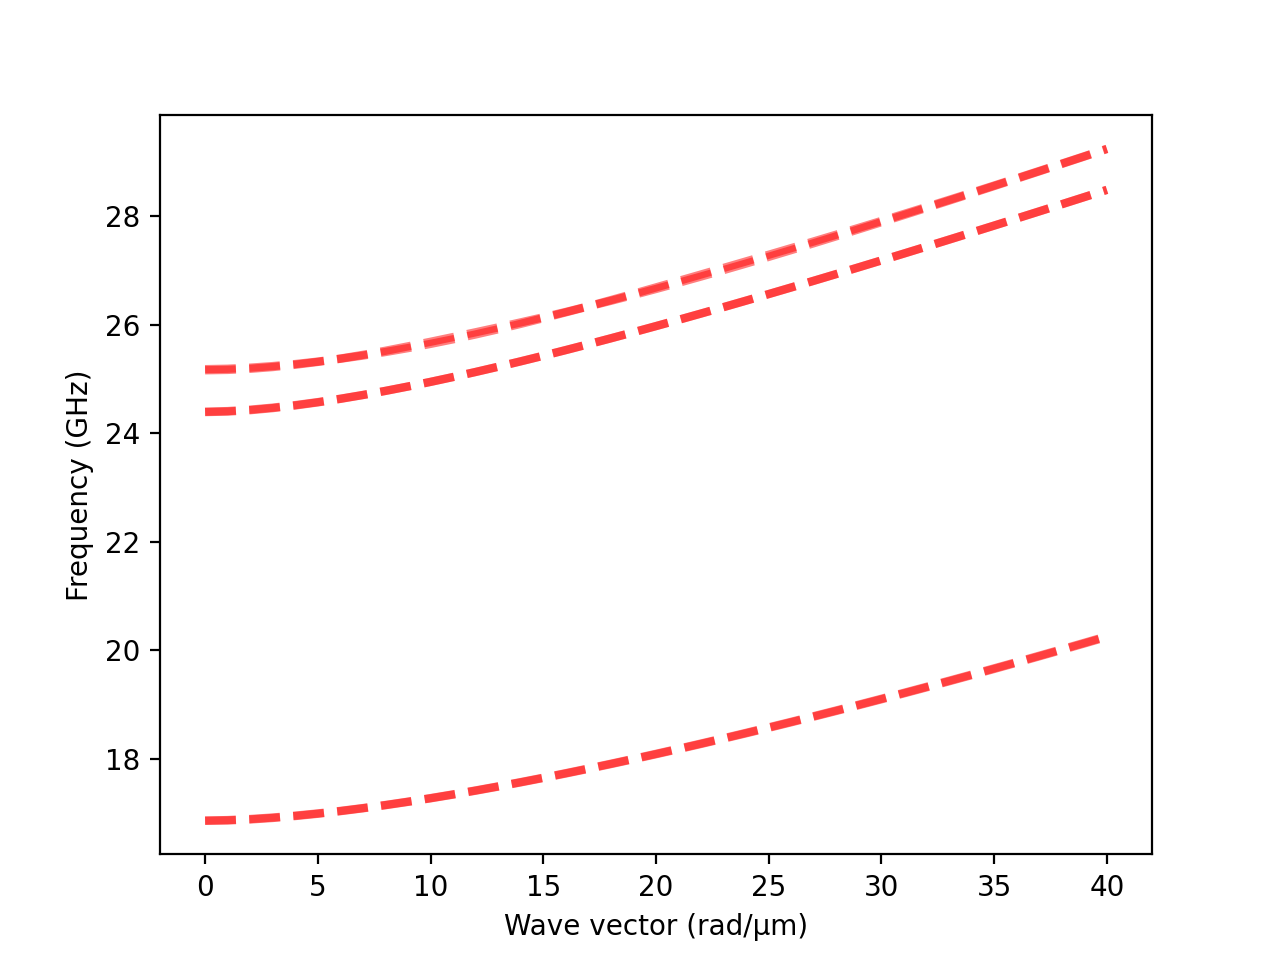

In [6]:
k_ = dispersion["k (rad/m)"]
plt.figure()
for i in range(6):
    plt.plot(k_*1e-6, dispersion[f"f{i} (GHz)"].values, ls="--", linewidth=3, color="red", alpha=0.5)
    
plt.xlabel("Wave vector (rad/µm)")
plt.ylabel("Frequency (GHz)")
plt.show()